0                     Date  Phone_Time_min  Computer_Time_min  Study_Time_min  \
count                   68       68.000000          68.000000       68.000000   
mean   2025-03-21 12:00:00      337.426471         153.720588      115.147059   
min    2025-02-16 00:00:00      108.000000           0.000000        0.000000   
25%    2025-03-04 18:00:00      251.250000          48.250000        0.000000   
50%    2025-03-21 12:00:00      341.000000         135.000000      112.500000   
75%    2025-04-07 06:00:00      410.500000         246.250000      196.250000   
max    2025-04-24 00:00:00      705.000000         426.000000      330.000000   
std                    NaN      124.503350         124.889903      111.753228   

0      Phone_Distractions  Study_Sessions  Total_Screen_Time_min  
count           68.000000       68.000000              68.000000  
mean             1.529412        1.235294             491.147059  
min              0.000000        0.000000             166.000000  
25

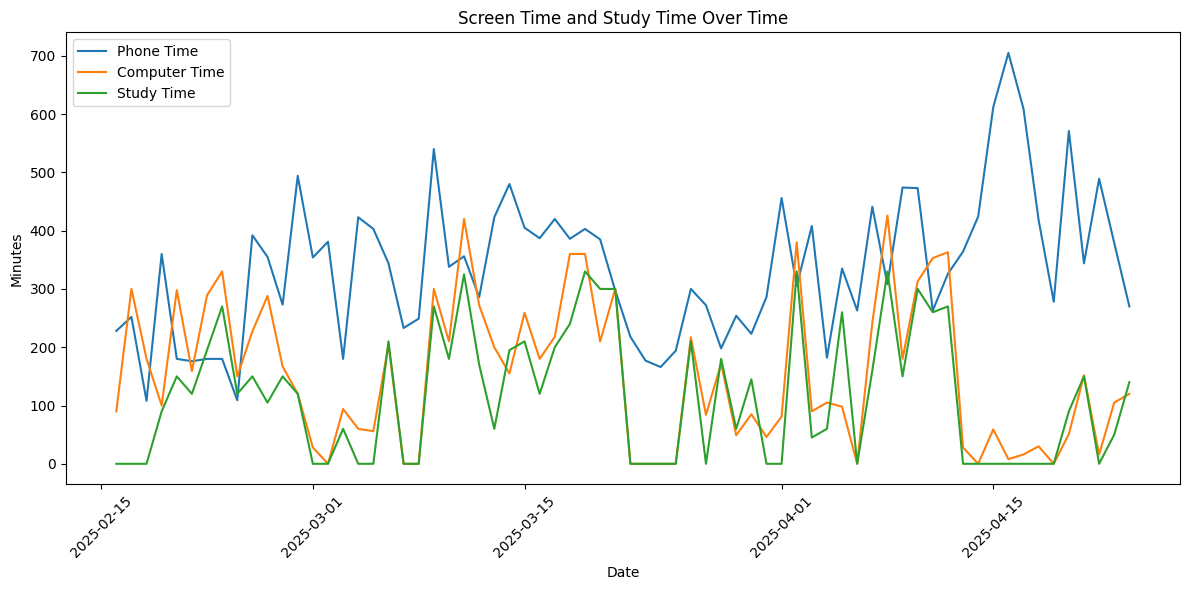

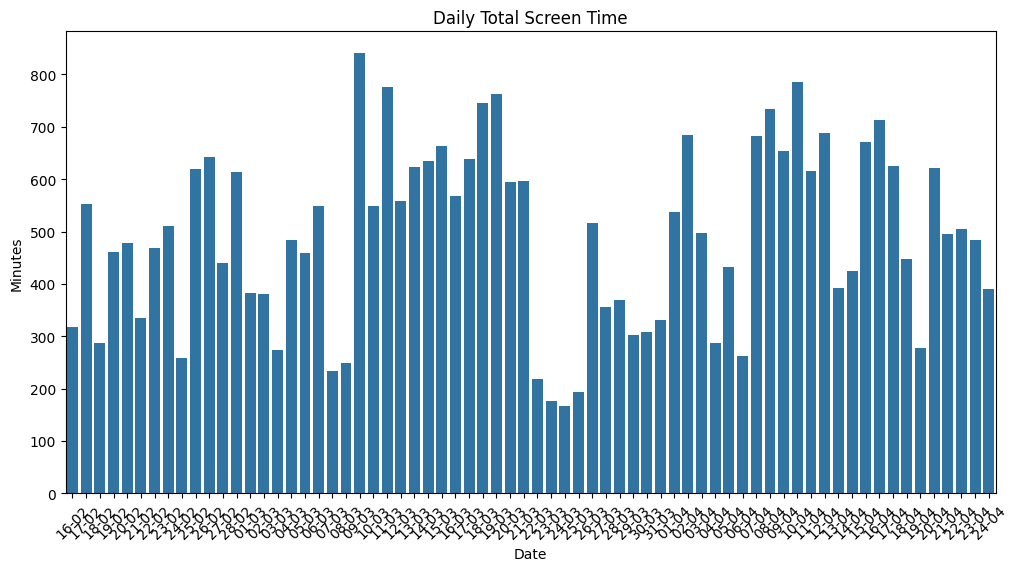

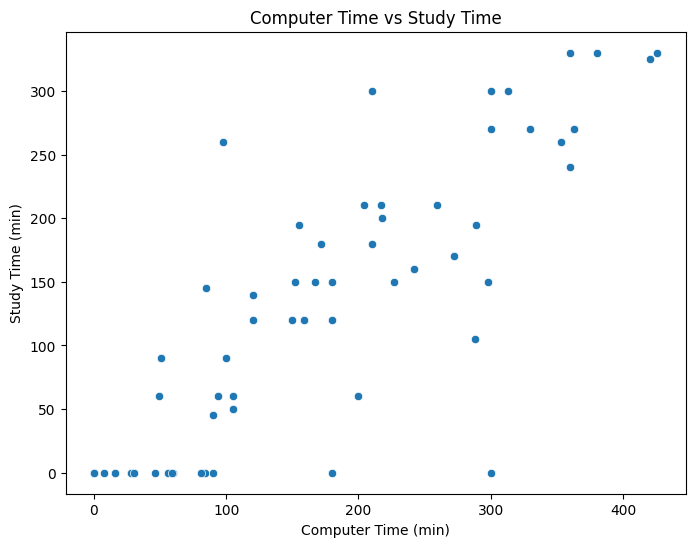

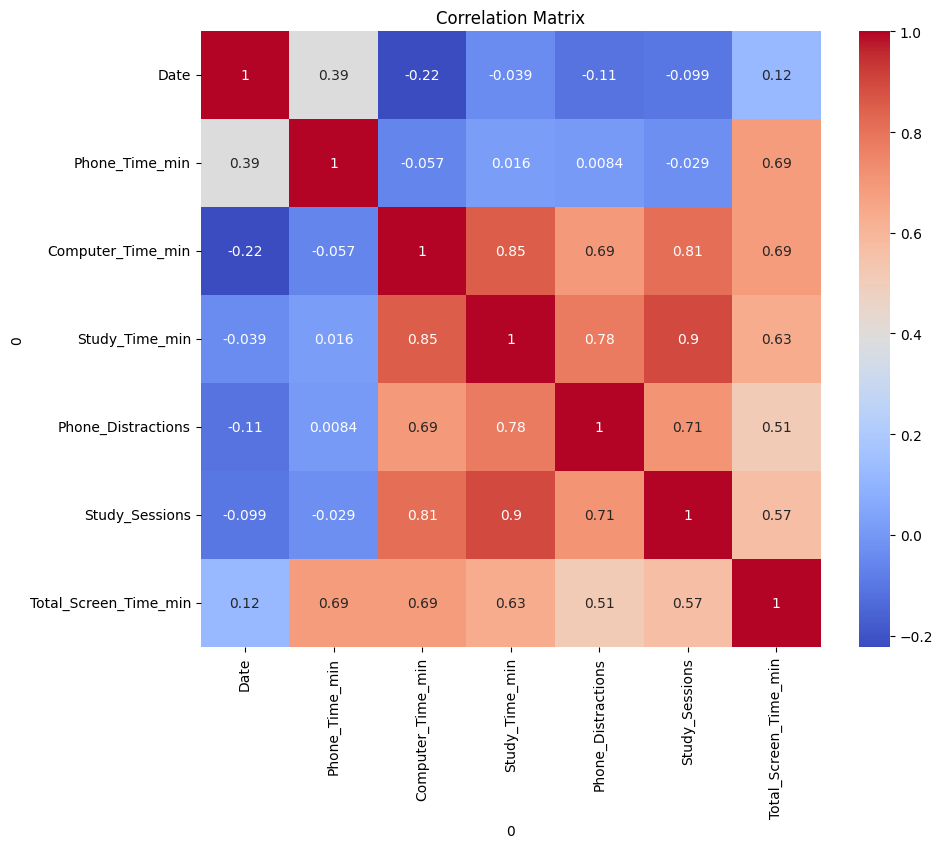

Total Screen Time vs Study Time: r = 0.635, p-value = 0.0000
Phone Distractions vs Study Time: r = 0.780, p-value = 0.0000
Phone Time vs Study Sessions: r = -0.029, p-value = 0.8118


In [ ]:

## Code


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data
df_raw = pd.read_excel('raw_data.2.xlsx', engine='openpyxl')

# Set proper headers
new_header = df_raw.iloc[0]
df = df_raw[1:].copy()
df.columns = new_header

# Rename columns
df.rename(columns={
    'Date': 'Date',
    'Phone Time/minute': 'Phone_Time_min',
    'Computer Time/minute': 'Computer_Time_min',
    'Study Time/minute': 'Study_Time_min',
    'Distraction by Phone': 'Phone_Distractions',
    'Study Session': 'Study_Sessions'
}, inplace=True)

# Convert date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Convert numeric columns
for col in ['Phone_Time_min', 'Computer_Time_min', 'Study_Time_min', 'Phone_Distractions', 'Study_Sessions']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Total screen time
df['Total_Screen_Time_min'] = df['Phone_Time_min'] + df['Computer_Time_min']

# EDA
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Phone_Time_min'], label='Phone Time')
plt.plot(df['Date'], df['Computer_Time_min'], label='Computer Time')
plt.plot(df['Date'], df['Study_Time_min'], label='Study Time')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.title('Screen Time and Study Time Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=df['Date'].dt.strftime('%d-%m'), y=df['Total_Screen_Time_min'])
plt.xticks(rotation=45)
plt.title('Daily Total Screen Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.show()


# Scatter plot: Computer Time vs Study Time
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Computer_Time_min'], y=df['Study_Time_min'])
plt.title('Computer Time vs Study Time')
plt.xlabel('Computer Time (min)')
plt.ylabel('Study Time (min)')
plt.show()


# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Tests
r1, p1 = pearsonr(df['Total_Screen_Time_min'], df['Study_Time_min'])
r2, p2 = pearsonr(df['Phone_Distractions'], df['Study_Time_min'])
r3, p3 = pearsonr(df['Phone_Time_min'], df['Study_Sessions'])

print(f"Total Screen Time vs Study Time: r = {r1:.3f}, p-value = {p1:.4f}")
print(f"Phone Distractions vs Study Time: r = {r2:.3f}, p-value = {p2:.4f}")
print(f"Phone Time vs Study Sessions: r = {r3:.3f}, p-value = {p3:.4f}")
